In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import ast
from collections import defaultdict

## Lectura de archivos

In [4]:
florida = pd.read_csv("data_florida.csv")

In [5]:
california = pd.read_csv("data_california.csv")

In [6]:
florida.head()

,business_id,name,state,postal_code,latitude,longitude,city,categories,specific_asian,rating,review_count,user_id,review_rating,review_text,review_date,has_delivery
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,FL,33602,27.955269,-82.456320,Tampa Bay,['asian'],asian other,4.0,10.0,01cQC-PaQb-cqbRAvwJU-A,5.0,"I have traveled to Vietnam several times, love...",2022-01-03 01:18:29,False
1,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,FL,33544,28.196252,-82.380615,Wesley Chapel,"['american (fast food)', 'american (new)', 'am...",unrelated,4.5,95.0,kSlFIcuZb0SQJPXVHsabGA,4.0,"The food here is seriously good, and that's im...",2022-01-15 23:11:10,True
2,vje0KIiE7vtpx7JzmBx5LQ,The Pearl,FL,33706,27.769405,-82.767317,Treasure Island,"['french', 'mediterranean']",unrelated,4.0,129.0,nP3qcVYQuhXg2d41pPe8MQ,2.0,We select Pearl based on a local. Allowing fo...,2022-01-01 18:39:09,True
3,CtMEJxpVMlNzFpB4PtFjfA,Aussie Grill,FL,33559,28.192191,-82.396367,Lutz,"['american (fast food)', 'american (traditiona...",unrelated,4.0,75.0,Q2DaiY41ZYLI4cLPKL-4lQ,1.0,"ONE STAR, IN THIS INSTANCE, IS VERY GENEROUS!!...",2022-01-07 22:52:08,True
4,Ucl9Vo5lwrUmYbV8Dv8X5g,O'Briens Irish Pub,FL,33618,28.092360,-82.500588,Tampa,"['european', 'pub/nightlife']",unrelated,4.0,108.0,HUAGoY78wGDtpXuMqINygQ,5.0,I've been enjoying the Pub for years! Great li...,2022-01-15 17:42:38,False


In [7]:
florida.describe()

,latitude,longitude,rating,review_count,review_rating
count,74232.000000,74232.000000,74232.000000,74232.000000,74232.000000
mean,34.645335,-89.232798,4.022356,458.614762,3.966079
std,5.454922,13.641199,0.475301,901.988144,1.420594
min,26.912436,-120.000068,3.000000,0.000000,1.000000
25%,28.131609,-90.189529,3.700000,78.000000,3.000000
50%,36.128041,-86.141557,4.000000,207.000000,5.000000
75%,39.824776,-82.451467,4.500000,483.000000,5.000000
max,53.645071,-74.680250,5.000000,7400.000000,5.000000


- Convertir la columna 'categories' a listas

In [8]:
california.describe()

,latitude,longitude,rating,review_count,review_rating
count,15410.000000,15410.000000,15410.000000,15410.000000,15410.000000
mean,35.629912,-96.469188,4.073005,311.035886,4.006619
std,4.763823,17.344798,0.465199,421.068116,1.401475
min,27.688229,-120.706070,3.000000,1.000000,1.000000
25%,32.223032,-119.318115,4.000000,68.000000,3.000000
50%,36.522298,-86.920656,4.000000,163.000000,5.000000
75%,39.730083,-82.646483,4.500000,381.000000,5.000000
max,53.640120,-74.704738,5.000000,3834.000000,5.000000


In [9]:
california['categories'].apply(type).value_counts()

categories
<class 'str'>    15410
Name: count, dtype: int64

In [10]:
florida['categories'].apply(type).value_counts()

categories
<class 'str'>    74232
Name: count, dtype: int64

In [11]:
florida['categories'].head(10)

0                                            ['asian']
1    ['american (fast food)', 'american (new)', 'am...
2                          ['french', 'mediterranean']
3    ['american (fast food)', 'american (traditiona...
4                        ['european', 'pub/nightlife']
5    ['american (fast food)', 'american (traditiona...
6    ['american (fast food)', 'american (traditiona...
7    ['american (fast food)', 'american (traditiona...
8    ['american (fast food)', 'american (traditiona...
9    ['american (fast food)', 'american (traditiona...
Name: categories, dtype: object

In [12]:
def convertir_a_lista(df, columna):
    """
    Convierte las cadenas que representan listas en la columna especificada del DataFrame a listas reales.

    Parámetros:
    df : pandas.DataFrame
        El DataFrame que contiene la columna con cadenas de texto.
    columna : str
        El nombre de la columna a la que se le debe aplicar la conversión.

    Retorna:
    pandas.DataFrame
        El DataFrame con la columna especificada convertida a listas.
    """
    def convertir(x):
        if isinstance(x, str):
            # Eliminar espacios en blanco antes de intentar convertir
            x = x.strip()
            if x.startswith("[") and x.endswith("]"):
                try:
                    # Intentamos convertir la cadena a una lista
                    return ast.literal_eval(x)
                except (ValueError, SyntaxError):
                    return []  # En caso de que haya error, devolvemos una lista vacía
            return []  # Si la cadena no tiene formato de lista, devolvemos una lista vacía
        return x  # No cambiar si no es una cadena

    df[columna] = df[columna].apply(convertir)
    return df

In [13]:
florida = convertir_a_lista(florida, 'categories')

In [14]:
florida['categories'].apply(type).value_counts()

categories
<class 'list'>    74232
Name: count, dtype: int64

In [15]:
california = convertir_a_lista(california, 'categories')

In [16]:
california['categories'].apply(type).value_counts()

categories
<class 'list'>    15410
Name: count, dtype: int64

# **Análisis de datos**

## Análisis de popularidad

In [17]:
def contar_categorias_y_promedios(data, columna_categorias, columna_valoraciones, columna_recuento):
    """
    Cuenta las categorías, calcula el promedio de valoraciones (rating),
    el promedio de `review_count` y la suma de `review_count` para cada categoría.

    Parámetros:
        data (pd.DataFrame): DataFrame que contiene las categorías, valoraciones y el recuento de reseñas.
        columna_categorias (str): Nombre de la columna con las categorías (listas de palabras).
        columna_valoraciones (str): Nombre de la columna con las valoraciones.
        columna_recuento (str): Nombre de la columna con el recuento de reseñas (`review_count`).

    Retorna:
        pd.DataFrame: DataFrame con las categorías, sus frecuencias, el promedio de valoraciones,
        el promedio de `review_count` y la suma de `review_count`.
    """
    # Verificar que las columnas existan
    if columna_categorias not in data.columns or columna_valoraciones not in data.columns or columna_recuento not in data.columns:
        raise ValueError("Las columnas especificadas no están presentes en el DataFrame.")

    # Imputar valores faltantes
    data[columna_valoraciones] = data[columna_valoraciones].fillna(data[columna_valoraciones].mean())
    data[columna_recuento] = data[columna_recuento].fillna(0)

    # Aplanar las categorías junto con sus valoraciones y recuento de reseñas
    categorias_planas = []
    for _, row in data.iterrows():
        categorias = row[columna_categorias]
        valoracion = row[columna_valoraciones]
        recuento = row[columna_recuento]

        # Convertir categorías en lista si es necesario
        if isinstance(categorias, str):
            categorias = re.findall(r"[a-zA-Z\s\(\)&/-]+", categorias.lower())

        if isinstance(categorias, list):
            for categoria in categorias:
                # Limpiar categorías de caracteres extraños (corchetes, comillas)
                categoria_limpia = re.sub(r"[\[\]']", "", categoria).strip()
                categorias_planas.append((categoria_limpia, valoracion, recuento))

    # Contar frecuencias de las categorías
    categorias_frecuencias = Counter([cat for cat, _, _ in categorias_planas])

    # Calcular promedios y suma de `review_count` por categoría
    categorias_valoraciones = defaultdict(list)
    categorias_recuento = defaultdict(list)

    for categoria, valoracion, recuento in categorias_planas:
        categorias_valoraciones[categoria].append(valoracion)
        categorias_recuento[categoria].append(recuento)

    categorias_promedios_valoraciones = {
        cat: round(sum(vals) / len(vals), 2)
        for cat, vals in categorias_valoraciones.items()
    }

    categorias_promedios_recuento = {
        cat: round(sum(vals) / len(vals), 2)
        for cat, vals in categorias_recuento.items()
    }

    categorias_sumas_recuento = {
        cat: round(sum(vals), 2)
        for cat, vals in categorias_recuento.items()
    }

    # Combinar resultados en un DataFrame
    df_resultado = pd.DataFrame({
        "Categoría": categorias_frecuencias.keys(),
        "Frecuencia": categorias_frecuencias.values(),
        "Promedio Valoraciones": [categorias_promedios_valoraciones[cat] for cat in categorias_frecuencias.keys()],
        "Promedio Review Count": [categorias_promedios_recuento[cat] for cat in categorias_frecuencias.keys()],
        "Suma Review Count": [categorias_sumas_recuento[cat] for cat in categorias_frecuencias.keys()]
    })

    # Ordenar por frecuencia, promedio de valoraciones y suma de `review_count`
    df_resultado = df_resultado.sort_values(
        by=["Frecuencia", "Promedio Valoraciones", "Suma Review Count"],
        ascending=[False, False, False]
    )
    df_resultado.reset_index(drop=True, inplace=True)

    return df_resultado

In [18]:
popularidad_florida = contar_categorias_y_promedios(florida, 'categories', 'rating', 'review_count')

In [19]:
popularidad_florida

,Categoría,Frecuencia,Promedio Valoraciones,Promedio Review Count,Suma Review Count
0,american (traditional),35967,3.99,658.13,23670886.0
1,pub/nightlife,29696,3.99,438.57,13023840.0
2,american (new),24847,4.06,526.96,13093408.0
3,asian,17962,4.03,336.11,6037185.0
4,american (fast food),15118,3.94,359.08,5428509.0
5,breakfast/brunch,14095,4.06,947.43,13354031.0
6,coffee/tea culture,9280,4.20,644.97,5985277.0
7,mexican,7946,3.97,287.49,2284387.0
8,italian,7786,4.04,362.08,2819152.0
9,mediterranean,3996,4.18,413.59,1652713.0


In [20]:
popularidad_california = contar_categorias_y_promedios(california, 'categories', 'rating', 'review_count')

In [21]:
popularidad_california

,Categoría,Frecuencia,Promedio Valoraciones,Promedio Review Count,Suma Review Count
0,american (traditional),7396,4.04,365.39,2702402
1,pub/nightlife,5317,4.01,383.82,2040772
2,american (new),4884,4.11,336.65,1644185
3,asian,3522,4.10,283.16,997274
4,american (fast food),3395,4.01,246.01,835214
5,breakfast/brunch,2820,4.14,384.25,1083571
6,coffee/tea culture,2050,4.19,380.63,780283
7,mexican,1759,4.14,379.11,666863
8,italian,1424,4.00,225.60,321253
9,mediterranean,817,4.14,287.05,234519


In [22]:
data_combinada = pd.concat([florida, california])

In [23]:
popularidad_estados = contar_categorias_y_promedios(data_combinada, 'categories', 'rating', 'review_count')

In [24]:
popularidad_estados

,Categoría,Frecuencia,Promedio Valoraciones,Promedio Review Count,Suma Review Count
0,american (traditional),43363,3.99,608.20,26373288.0
1,pub/nightlife,35013,3.99,430.26,15064612.0
2,american (new),29731,4.06,495.70,14737593.0
3,asian,21484,4.04,327.43,7034459.0
4,american (fast food),18513,3.96,338.34,6263723.0
5,breakfast/brunch,16915,4.07,853.54,14437602.0
6,coffee/tea culture,11330,4.20,597.14,6765560.0
7,mexican,9705,4.00,304.10,2951250.0
8,italian,9210,4.04,340.98,3140405.0
9,mediterranean,4813,4.17,392.11,1887232.0


# Reseñas mensuales

In [25]:
def process_cuisine_categories(df, category_col='categories', date_col='review_date'):
    """
    Procesa una columna con listas de categorías en un DataFrame para descomponerlas,
    limpiarlas y calcular tendencias y totales de reseñas agrupados por mes y año.

    Args:
        df (pd.DataFrame): DataFrame que contiene la columna de categorías y fechas de reseñas.
        category_col (str): Nombre de la columna que contiene las categorías en formato de lista.
        date_col (str): Nombre de la columna que contiene las fechas de las reseñas.

    Returns:
        tuple:
            - category_trends (pd.DataFrame): Tendencias de las categorías por mes y año.
            - total_reviews (pd.DataFrame): Total de reseñas agrupadas por categoría.

    Example:
        category_trends, total_reviews = process_cuisine_categories(california_todos)
    """
    # Convertir cadenas que parecen listas en listas reales (si es necesario)
    df[category_col] = df[category_col].apply(lambda x: eval(x) if isinstance(x, str) else x)

    # Convertir la columna de fechas a formato datetime
    df[date_col] = pd.to_datetime(df[date_col])

    # Crear una columna para el mes y año de las fechas
    df['month_year'] = df[date_col].dt.to_period('M').astype(str)

    # Explosión de listas en filas individuales
    df = df.explode(category_col)

    # Limpieza de caracteres no deseados y normalización de texto
    df[category_col] = df[category_col].str.strip("[]'").str.lower()

    # Agrupación por categorías y mes-año para calcular las tendencias
    category_trends = df.groupby([category_col, 'month_year']).size().reset_index(name='review_count')

    # Suma total de reseñas por categoría
    total_reviews = category_trends.groupby(category_col)['review_count'].sum().reset_index()

    # Ordenar las categorías por el número total de reseñas
    total_reviews = total_reviews.sort_values(by='review_count', ascending=False).reset_index(drop=True)

    return category_trends, total_reviews

category_trends_ca, total_reviews_ca = process_cuisine_categories(california)


In [26]:
pd.set_option('display.max_rows', None)

In [27]:
print(category_trends_ca)

                 categories month_year  review_count
0      american (fast food)    2021-01           237
1      american (fast food)    2021-02           225
2      american (fast food)    2021-03           306
3      american (fast food)    2021-04           249
4      american (fast food)    2021-05           242
5      american (fast food)    2021-06           252
6      american (fast food)    2021-07           245
7      american (fast food)    2021-08           249
8      american (fast food)    2021-09           205
9      american (fast food)    2021-10           207
10     american (fast food)    2021-11           170
11     american (fast food)    2021-12           202
12     american (fast food)    2022-01           258
13     american (fast food)    2022-05             2
14     american (fast food)    2022-08             2
15     american (fast food)    2022-09             6
16     american (fast food)    2022-10             8
17     american (fast food)    2022-11        

In [28]:
print(total_reviews_ca)

                categories  review_count
0   american (traditional)          7396
1            pub/nightlife          5317
2           american (new)          4884
3                    asian          3522
4     american (fast food)          3395
5         breakfast/brunch          2820
6       coffee/tea culture          2050
7                  mexican          1759
8                  italian          1424
9            mediterranean           817
10        vegan/vegetarian           738
11          latin american           335
12                  french           262
13                   greek           235
14                desserts           204
15               caribbean           190
16                european           160
17          middle eastern           118
18                 seafood            84
19                 spanish            52


In [29]:
data_combinada = pd.concat([florida, california])

In [30]:
category_trends_combinados, total_reviews_combinados = process_cuisine_categories(data_combinada)

In [31]:
total_reviews_combinados

,categories,review_count
0,american (traditional),43363
1,pub/nightlife,35013
2,american (new),29731
3,asian,21484
4,american (fast food),18513
5,breakfast/brunch,16915
6,coffee/tea culture,11330
7,mexican,9705
8,italian,9210
9,mediterranean,4813


In [32]:
def expand_categories(df, categories_col="categories", other_cols=None):
    """
    Aplana las listas de la columna `categories` para que cada categoría tenga su propia fila.

    Parámetros:
        df (pd.DataFrame): DataFrame original.
        categories_col (str): Nombre de la columna con las listas de categorías.
        other_cols (list): Columnas que se deben conservar en el nuevo DataFrame.

    Retorna:
        pd.DataFrame: DataFrame con una fila por categoría.
    """
    import pandas as pd

    # Configurar columnas adicionales que se deben conservar
    if other_cols is None:
        other_cols = df.columns.difference([categories_col]).tolist()

    # Crear una lista para las filas expandidas
    rows = []

    # Iterar sobre el DataFrame
    for _, row in df.iterrows():
        # Manejar caso en que categories sea una lista o un string que parezca lista
        categories = row[categories_col]
        if isinstance(categories, str):
            try:
                # Intentar convertir string a lista
                categories = eval(categories)
            except Exception:
                pass  # Mantener como string si no se puede evaluar

        # Si no es una lista, saltar
        if not isinstance(categories, list):
            continue

        # Expandir categorías en filas
        for category in categories:
            category_clean = category.strip().lower()  # Limpiar categoría
            new_row = {col: row[col] for col in other_cols}
            new_row["category"] = category_clean
            rows.append(new_row)

    # Crear nuevo DataFrame expandido
    return pd.DataFrame(rows)


In [33]:
fl = expand_categories(florida, categories_col="categories")


In [34]:
def plot_reviews_per_year(df, year_col="review_date", categories_col="category", rating_col="review_rating"):
    """
    Crea gráficos de barras para el número de reviews por año para las 10 categorías más frecuentes.

    Parámetros:
        df (pd.DataFrame): DataFrame expandido con columnas "year" y "category".
        year_col (str): Nombre de la columna con las fechas o años.
        categories_col (str): Nombre de la columna con las categorías (después de expandir).
        rating_col (str): Nombre de la columna con las valoraciones de reviews.

    Retorna:
        None. Muestra los gráficos.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Validar que las columnas necesarias existan
    if year_col not in df.columns:
        raise KeyError(f"La columna '{year_col}' no está presente en el DataFrame.")
    if categories_col not in df.columns:
        raise KeyError(f"La columna '{categories_col}' no está presente en el DataFrame.")
    if rating_col not in df.columns:
        raise KeyError(f"La columna '{rating_col}' no está presente en el DataFrame.")

    # Asegurarse de que year esté calculado a partir de year_col
    if "year" not in df.columns:
        try:
            df[year_col] = pd.to_datetime(df[year_col])  # Convertir a formato datetime
            df["year"] = df[year_col].dt.year  # Extraer el año
        except Exception as e:
            raise ValueError(f"No se pudo calcular 'year' a partir de '{year_col}': {e}")

    # Contar reviews por año y categoría
    grouped = (
        df.groupby(["year", categories_col])
        .size()
        .reset_index(name="review_count")
    )

    # Obtener las 10 categorías más frecuentes
    top_categories = (
        grouped.groupby(categories_col)["review_count"]
        .sum()
        .nlargest(10)
        .index.tolist()
    )
    top_grouped = grouped[grouped[categories_col].isin(top_categories)]

    # Crear subplots
    fig, axes = plt.subplots(5, 2, figsize=(15, 25), sharey=True)
    axes = axes.flatten()

    for i, category in enumerate(top_categories):
        sns.barplot(
            data=top_grouped[top_grouped[categories_col] == category],
            x="year",
            y="review_count",
            ax=axes[i],
            palette="coolwarm"
        )
        axes[i].set_title(f"Reviews por Año: {category.title()}", fontsize=12)
        axes[i].set_xlabel("Año")
        axes[i].set_ylabel("Cantidad de Reviews")

    plt.tight_layout()
    plt.show()


In [35]:
print(fl.columns)


Index(['business_id', 'city', 'has_delivery', 'latitude', 'longitude', 'name',
       'postal_code', 'rating', 'review_count', 'review_date', 'review_rating',
       'review_text', 'specific_asian', 'state', 'user_id', 'category'],
      dtype='object')


In [36]:
print(fl["review_date"].head())
print(fl["review_date"].dtype)


0    2022-01-03 01:18:29
1    2022-01-15 23:11:10
2    2022-01-15 23:11:10
3    2022-01-15 23:11:10
4    2022-01-15 23:11:10
Name: review_date, dtype: object
object


# Distribución de reviews por categorías

In [41]:
def plot_rating_vs_review_count(df, categories_col="categories", rating_col="review_rating"):
    """
    Genera un gráfico de dispersión para comparar el promedio de valoraciones
    contra el recuento de reseñas por categoría.

    Parámetros:
        df (pd.DataFrame): DataFrame original con las columnas necesarias.
        categories_col (str): Columna con listas de categorías.
        rating_col (str): Columna con las valoraciones de reviews.

    Retorna:
        None. Muestra el gráfico.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Expandir categorías
    expanded_df = expand_categories(df, categories_col=categories_col, other_cols=[rating_col])

    # Calcular métricas por categoría
    metrics = expanded_df.groupby("category").agg(
        avg_rating=(rating_col, "mean"),
        review_count=(rating_col, "size")
    ).reset_index()

    # Crear gráfico de dispersión
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=metrics,
        x="review_count",
        y="avg_rating",
        size="review_count",
        sizes=(40, 400),
        hue="avg_rating",
        palette="viridis",
        legend=False
    )
    plt.title("Promedio de Valoraciones vs Recuento de Reseñas por Categoría", fontsize=16)
    plt.xlabel("Recuento de Reseñas")
    plt.ylabel("Promedio de Valoraciones")
    plt.show()


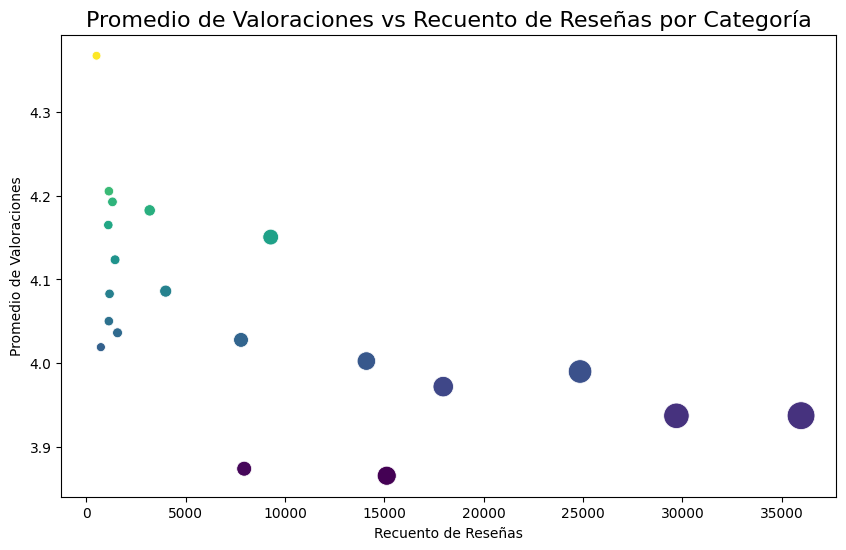

In [42]:
plot_rating_vs_review_count(florida, categories_col="categories", rating_col="review_rating")


In [43]:
def plot_stacked_bar_separate_years(df, year_col="review_date", categories_col="categories", review_col="review_rating", top_n=12):
    """
    Crea un gráfico de barras apiladas por categoría para cada año en un gráfico separado.
    Cada gráfico tiene una única barra apilada que representa ese año.

    Parámetros:
        df (pd.DataFrame): DataFrame original con las columnas necesarias.
        year_col (str): Columna que contiene la fecha.
        categories_col (str): Columna con listas de categorías.
        review_col (str): Columna con las valoraciones de las reseñas.
        top_n (int): Número de categorías principales para incluir.

    Retorna:
        None. Muestra los gráficos.
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    # Convertir la columna de fechas a formato datetime y extraer años
    df[year_col] = pd.to_datetime(df[year_col], errors="coerce")
    df["year"] = df[year_col].dt.year

    # Expandir categorías
    expanded_df = expand_categories(df, categories_col=categories_col, other_cols=["year", review_col])

    # Contar reseñas por año y categoría
    grouped = expanded_df.groupby(["year", "category"]).size().reset_index(name="review_count")

    # Obtener las N categorías más frecuentes globalmente
    top_categories = (
        grouped.groupby("category")["review_count"]
        .sum()
        .nlargest(top_n)
        .index.tolist()
    )
    grouped = grouped[grouped["category"].isin(top_categories)]

    # Pivotear para preparar datos de barras apiladas
    pivot = grouped.pivot(index="year", columns="category", values="review_count").fillna(0)

    # Crear un gráfico separado para cada año
    years = sorted(pivot.index.tolist())
    for year in years:
        plt.figure(figsize=(8, 6))
        pivot.loc[[year]].plot(kind="bar", stacked=True, figsize=(8, 6), colormap="tab20", width=0.5)
        plt.title(f"Distribución de Categorías - {year}", fontsize=14)
        plt.xlabel("Año", fontsize=12)
        plt.ylabel("Cantidad de Reviews", fontsize=12)
        plt.xticks(ticks=[], labels=[])  # Eliminar etiquetas del eje X (solo hay una barra)
        plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.show()


<Figure size 800x600 with 0 Axes>

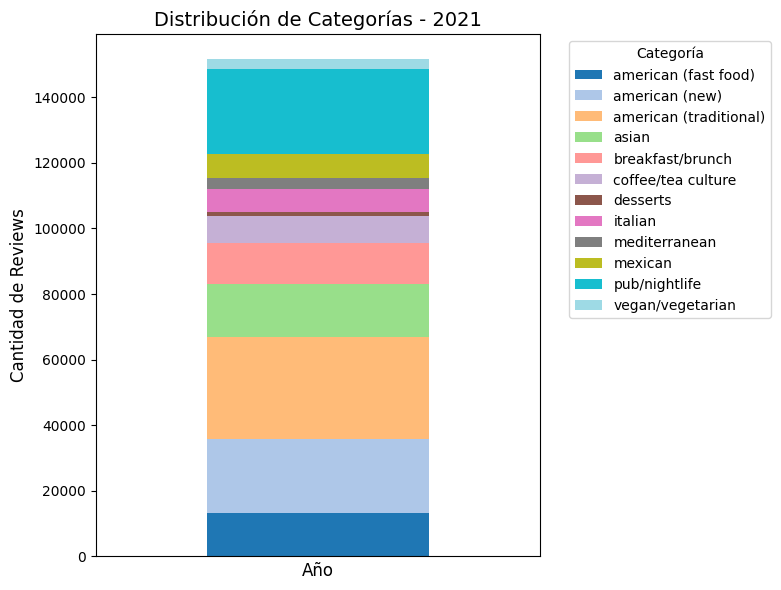

<Figure size 800x600 with 0 Axes>

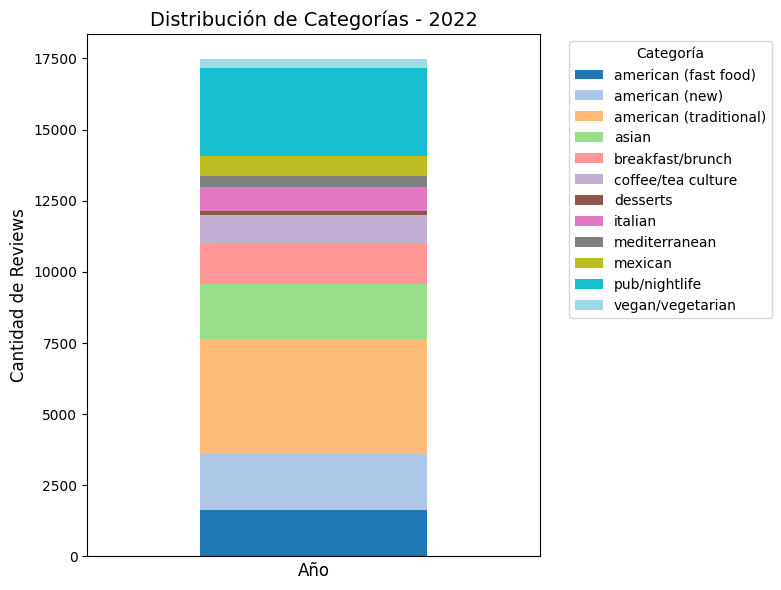

<Figure size 800x600 with 0 Axes>

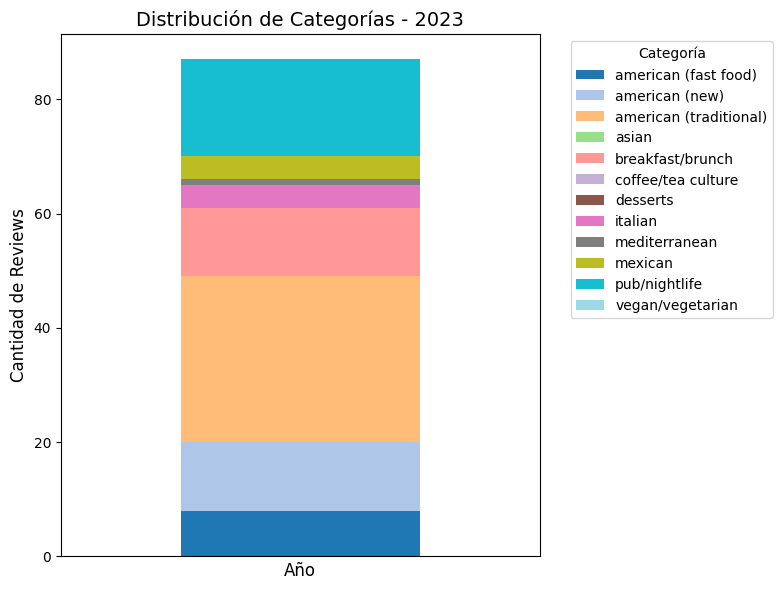

<Figure size 800x600 with 0 Axes>

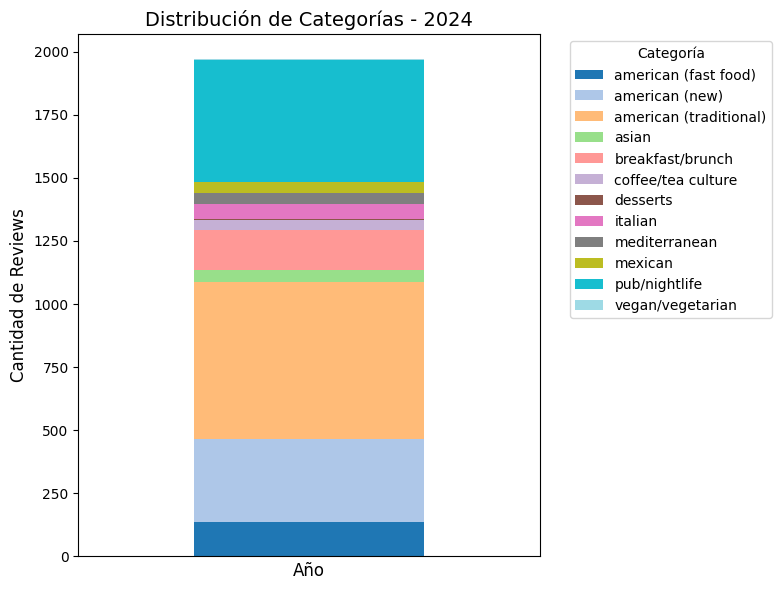

<Figure size 800x600 with 0 Axes>

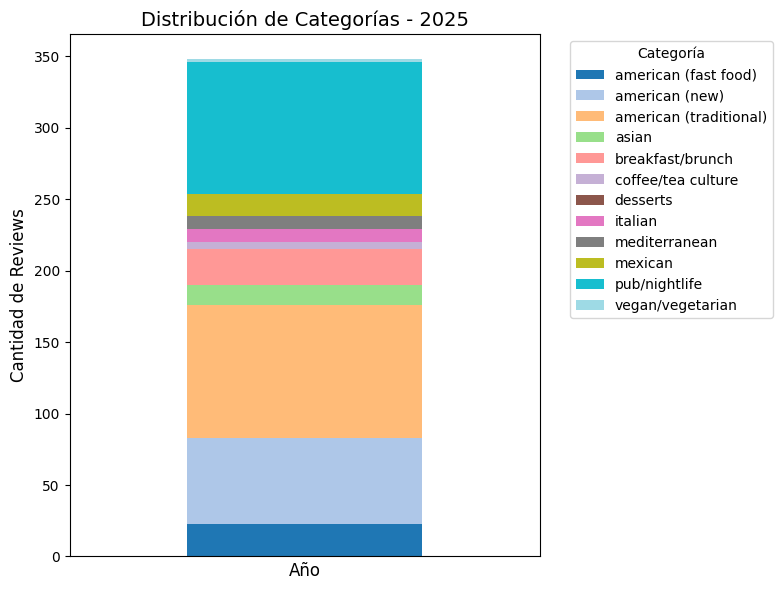

In [44]:
plot_stacked_bar_separate_years(
    florida, 
    year_col="review_date", 
    categories_col="categories", 
    review_col="review_rating", 
    top_n=12  # Número de categorías principales
)
